<a href="https://colab.research.google.com/github/Nikhil-24K/GenerativeAI/blob/GAN_scenarios/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Autoencoders - Anomaly Detection : Execute autoencoders utilizing a dataset and evaluate its anomaly detection capabilities. To comprehend the architecture and operation of autoencoders for anomaly detection.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
(train_data,_),(test_data,_) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_data = train_data.astype('float32')/255.0
test_data = test_data.astype('float32')/255.0

In [ ]:
train_data = train_data.reshape((len(train_data),np.prod(train_data.shape[1:])))
test_data = test_data.reshape((len(test_data),np.prod(test_data.shape[1:])))

In [ ]:
input_size = 784
encoding_dim = 32

In [ ]:
# Encoder
encoder = Sequential([
  Dense(128, activation='relu', input_shape=(input_size,)),
  Dense(64, activation='relu'),
  Dense(encoding_dim, activation='relu')
])
# Decoder
decoder = Sequential([
    Dense(128, activation='relu', input_shape=(encoding_dim,)),
    Dense(64, activation='relu'),
    Dense(input_size, activation='sigmoid')
])
# Combine Encoder and Decoder
autoencoder = Model(encoder.input, decoder(encoder.output))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 sequential_1 (Sequential)   (None, 784)               63440     
                                                                 
Total params: 174256 (680.69 KB)
Trainable params: 174256 (680.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the autoencoder on normal data
autoencoder.fit(train_data, train_data, epochs=10, batch_size=256, shuffle=True, validation_data=(test_data, test_data))


#Evaluate anomaly detection capabilities
decoded_imgs = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - decoded_imgs, 2), axis=1) # Mean Squared Error (MSE) as reconstructor


# Set a threshold for anomaly detection (adjust as needed)
threshold = 0.02


# Identify anomalies
anomalies =np.where(mse > threshold)[0]

Epoch 1/10
235/235 [==============================] - 5s 17ms/step - loss: 0.2534 - val_loss: 0.1721
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1532 - val_loss: 0.1384
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.1325 - val_loss: 0.1259
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1247 - val_loss: 0.1198
Epoch 5/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1192 - val_loss: 0.1155
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1149 - val_loss: 0.1114
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1113 - val_loss: 0.1087
Epoch 8/10
235/235 [==============================] - 3s 14ms/step - loss: 0.1087 - val_loss: 0.1061
Epoch 9/10
235/235 [==============================] - 5s 21ms/step - loss: 0.1063 - val_loss: 0.1037
Epoch 10/10
313/313 [==============================] - 1s 2ms/step


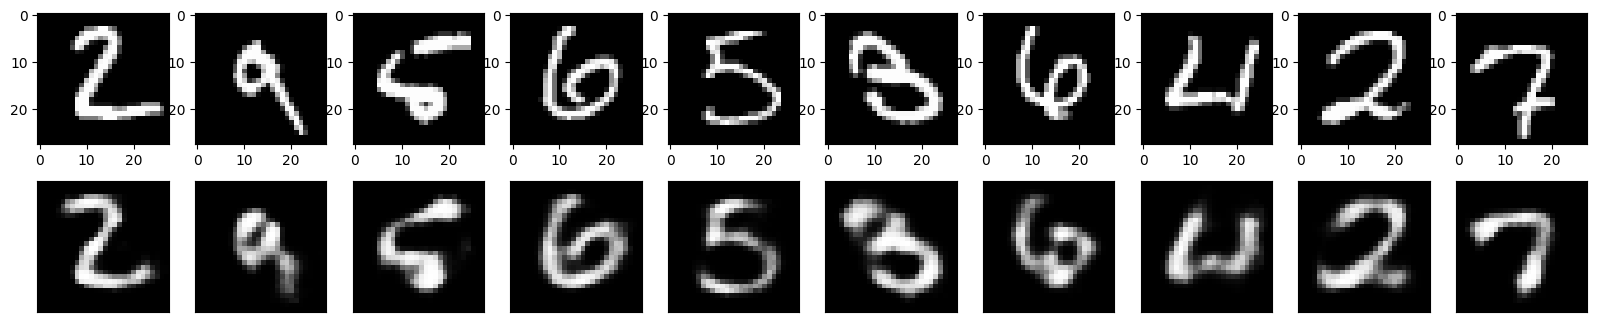

In [ ]:
n = 10 # Number of digits to display
plt.figure(figsize=(20,4))
for i, idx in enumerate(anomalies[:n]):
# Display anomaly images
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(test_data[idx].reshape(28,28))
  plt.gray()


  # Display the corresponding reconstructed images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[idx].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()



Second Approach

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,_),(x_test,_) = tf.keras.datasets.mnist.load_data()
x_train,x_test =x_train/255.0,x_test/255.0

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [ ]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

#Reshape data for autoencoder
x_train = x_train.reshape((len(x_train),28,28,1))
x_test = x_test.reshape((len(x_test),28,28,1))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy),28,28,1))
x_test_noisy = x_test_noisy.reshape((len(x_test_noisy),28,28,1))

In [ ]:
# Define the autiencoder model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(32,(3, 3), activation='relu', padding='same'))
model.add(layers.UpSampling2D((2, 2)))
model.add(layers.Conv2D(1,(3, 3), activation='sigmoid', padding='same'))


model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 32)       

In [ ]:
# Train the autoencoder
model.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))


# Evaluate the model on the test set
decoded_images = model.predict(x_test_noisy)


# Calculate reconstruction loss for each sample
reconstruction_loss = tf.keras.losses.binary_crossentropy(x_test, decoded_images)
reconstruction_loss = reconstruction_loss.numpy()


# Define a threshold for anomaly detection
threshold = np.mean(reconstruction_loss) + 2 * np.std(reconstruction_loss)


# Classify each sample as normal or anomaly
is_anomaly = reconstruction_loss > threshold

Epoch 1/10
469/469 [==============================] - 124s 261ms/step - loss: 0.1697 - val_loss: 0.1191
Epoch 2/10
469/469 [==============================] - 123s 262ms/step - loss: 0.1147 - val_loss: 0.1088
Epoch 3/10
469/469 [==============================] - 123s 261ms/step - loss: 0.1079 - val_loss: 0.1047
Epoch 4/10
469/469 [==============================] - 121s 259ms/step - loss: 0.1047 - val_loss: 0.1028
Epoch 5/10
469/469 [==============================] - 121s 258ms/step - loss: 0.1029 - val_loss: 0.1011
Epoch 6/10
469/469 [==============================] - 121s 257ms/step - loss: 0.1014 - val_loss: 0.0999
Epoch 7/10
469/469 [==============================] - 121s 258ms/step - loss: 0.1004 - val_loss: 0.0989
Epoch 8/10
469/469 [==============================] - 122s 260ms/step - loss: 0.0996 - val_loss: 0.0986
Epoch 9/10
469/469 [==============================] - 121s 259ms/step - loss: 0.0990 - val_loss: 0.0976
Epoch 10/10
313/313 [==============================] - 6s 19ms/s

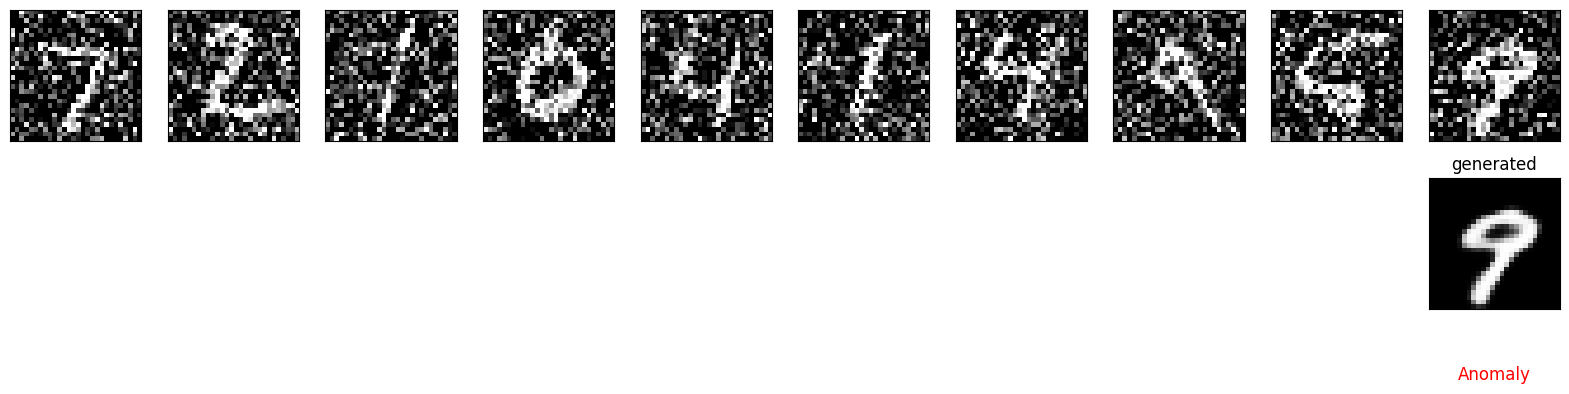

In [ ]:
num_display = 10
plt.figure(figsize=(20, 4))
for i in range(num_display):
#Display original images
  ax = plt.subplot(2, num_display, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


# Display reconstructed images
ax = plt.subplot(2, num_display, i + 1 + num_display)
plt.imshow(decoded_images[i].reshape(28, 28))
plt.gray()
plt.title("generated")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


# Mark anomalies
if is_anomaly[i].any(): # Use .any() to check if any element is True
  ax.text(0.5, -0.5, 'Anomaly', color='red', fontsize=12, ha='center', va='center', transform=ax.transAxes)
  plt.show()

